In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_data1 = pd.read_csv('dataset1.csv', encoding='cp949')
df_data2 = pd.read_csv('dataset2.csv', encoding='cp949')
df_data3 = pd.read_csv('dataset3.csv', encoding='cp949')
df_data4 = pd.read_csv('dataset4.csv', encoding='cp949')


# <금지체장>
# category_id : 1(넙치(광어)) Olive flounder  : 35이하
# category_id : 2(우럭(조피볼락)) Korea rockfish : 23이하
# category_id : 3(참돔) Red seabream : 24이하
# category_id : 4(감성돔) Black porgy : 25이하
# category_id : 5(돌돔) Rock bream : 24이하

# 5종 어류에 대한 학습/검증용 사진 총 40여만장으로 score model 생성

### 전처리

1. YOLOv5 모델에 연결 가능하도록 category_id 1부터 5를 0부터 4로 변경 (YOLOv5 모델은 0부터 시작)
2. dpi = 96 인 column 생성 (YOLOv5 모델의 dpi를 96으로 통일시킴)
3. dpi column을 width, height 뒤에 위치시키기 
4. category_id 와 fish_size (YOLOv5 모델에서 추출되는 값) 를 마지막에 함께 위치시키기

In [2]:
df_total = pd.concat([df_data1,df_data2, df_data3, df_data4], ignore_index=True)
df_total['dpi']= 96

df_total['category_id'] = df_total['category_id'].replace([1,2,3,4,5], [0,1,2,3,4])
df_total = df_total[['file_name', 'width', 'height', 'dpi', 'bbox', 'category_id', 'fish_size']]

df_total

,file_name,width,height,dpi,bbox,category_id,fish_size
0,./560364_objt_kr_2021-02-05_11-42-12-33_002.JPG,2704,1520,96,"[383, 292, 1012, 398]",1,26.775833
1,./311867_objt_bp_2021-01-19_15-31-35-33_002.JPG,2704,1520,96,"[938, 715, 1217, 552]",3,32.199791
2,./178923_objt_kr_2020-12-20_13-43-46-66_003.JPG,2704,1520,96,"[262, 743, 1286, 470]",1,34.025416
3,./234110_objt_bp_2021-01-12_09-55-50-00_001.JPG,2704,1520,96,"[413, 595, 1353, 673]",3,35.798125
4,./392885_objt_rb_2021-01-22_10-26-05-33_002.JPG,2704,1520,96,"[731, 39, 1113, 771]",4,29.448125
...,...,...,...,...,...,...,...
401199,./634921_objt_bp_2021-02-08_09-16-37-33_002.JPG,2704,1520,96,"[43, 625, 1421, 625]",3,37.597291
401200,./634962_objt_bp_2021-02-08_09-15-57-33_002.JPG,2704,1520,96,"[968, 284, 661, 247]",3,17.488958
401201,./634638_objt_bp_2021-02-08_09-12-35-33_002.JPG,2704,1520,96,"[1039, 411, 1183, 448]",3,31.300208
401202,./634616_objt_bp_2021-02-08_09-10-00-66_006.JPG,2704,1520,96,"[193, 361, 1112, 384]",3,29.421666


In [3]:
# category_id 1~5 => 0~4 로 변경되었는지 확인 

df_total['category_id'].value_counts()

1    80572
2    80302
3    80287
0    80079
4    79964
Name: category_id, dtype: int64

### <광어>

In [4]:
# 광어 : category_id = 0 / 체장금지길이 : 35이하 

df_total_광어 = df_total[(df_total['category_id']==0)&(df_total['fish_size'] > 35)]
df_total_광어

,file_name,width,height,dpi,bbox,category_id,fish_size
215,./559945_objt_of_2021-02-04_10-24-04-00_001.JPG,2704,1520,96,"[160, 288, 2123, 859]",0,56.171041
271,./476763_objt_of_2021-01-27_11-37-01-00_001.JPG,2704,1520,96,"[1214, 570, 1333, 564]",0,35.268958
865,./590295_objt_of_2021-02-06_09-12-06-66_003.JPG,2704,1520,96,"[393, 165, 1372, 881]",0,36.300833
1227,./458427_objt_of_2020-12-22_13-32-37-66_003.JPG,2704,1520,96,"[1207, 725, 1337, 532]",0,35.374791
1294,./590468_objt_of_2021-02-06_09-05-15-66_003.JPG,2704,1520,96,"[680, 315, 1338, 835]",0,35.401250
...,...,...,...,...,...,...,...
399552,./436161_objt_of_2020-12-22_10-12-08-00_001.JPG,2704,1520,96,"[1091, 144, 1446, 643]",0,38.258750
399660,./498778_objt_of_2021-02-03_10-16-04-66_003.JPG,2704,1520,96,"[758, 832, 1345, 590]",0,35.586458
400069,./589882_objt_of_2021-02-06_09-01-05-00_001.JPG,2704,1520,96,"[643, 231, 1521, 645]",0,40.243124
400967,./547135_objt_of_2021-02-04_09-11-29-33_002.JPG,2704,1520,96,"[1078, 194, 1485, 574]",0,39.290625


/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


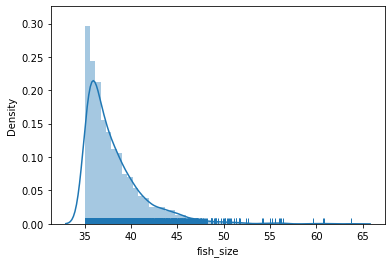

In [5]:
# 분포 확인

import seaborn as sns

x = df_total_광어['fish_size']
# sns.set(rc = {'figure.figsize':(10,8)})  #==> PPT에 붙일 때 주석 풀어서 진행하기
sns.distplot(x, kde=True, rug=True)
plt.show()

In [6]:
# 상위 %인지 백분위 수 형식으로 표시
# Percentitle Rank 숫자가 1에 가까울수록 좋은 것

df_total_광어['Percentile Rank'] = df_total_광어.fish_size.rank(pct = True, method='min').round(2)
df_total_광어

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/618429374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_광어['Percentile Rank'] = df_total_광어.fish_size.rank(pct = True, method='min').round(2)


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank
215,./559945_objt_of_2021-02-04_10-24-04-00_001.JPG,2704,1520,96,"[160, 288, 2123, 859]",0,56.171041,1.00
271,./476763_objt_of_2021-01-27_11-37-01-00_001.JPG,2704,1520,96,"[1214, 570, 1333, 564]",0,35.268958,0.08
865,./590295_objt_of_2021-02-06_09-12-06-66_003.JPG,2704,1520,96,"[393, 165, 1372, 881]",0,36.300833,0.34
1227,./458427_objt_of_2020-12-22_13-32-37-66_003.JPG,2704,1520,96,"[1207, 725, 1337, 532]",0,35.374791,0.11
1294,./590468_objt_of_2021-02-06_09-05-15-66_003.JPG,2704,1520,96,"[680, 315, 1338, 835]",0,35.401250,0.12
...,...,...,...,...,...,...,...,...
399552,./436161_objt_of_2020-12-22_10-12-08-00_001.JPG,2704,1520,96,"[1091, 144, 1446, 643]",0,38.258750,0.64
399660,./498778_objt_of_2021-02-03_10-16-04-66_003.JPG,2704,1520,96,"[758, 832, 1345, 590]",0,35.586458,0.17
400069,./589882_objt_of_2021-02-06_09-01-05-00_001.JPG,2704,1520,96,"[643, 231, 1521, 645]",0,40.243124,0.81
400967,./547135_objt_of_2021-02-04_09-11-29-33_002.JPG,2704,1520,96,"[1078, 194, 1485, 574]",0,39.290625,0.74


In [7]:
# 상위 %별 점수 부여

def get_score(Percentile_Rank):
    if Percentile_Rank >= 0.99: # 상위 0.1% 이내
        score = 100
    elif 0.90 < Percentile_Rank: # 상위 10% 이내
        score = 90
    elif 0.85 < Percentile_Rank: # 상위 15% 이내
        score = 85
    elif 0.80 <  Percentile_Rank: # 상위 20% 이내
        score = 80
    elif 0.75 < Percentile_Rank: # 상위 25% 이내
        score = 75
    elif 0.70 < Percentile_Rank: # 상위 30% 이내
        score = 70
    elif 0.65 < Percentile_Rank: # 상위 35% 이내
        score = 65
    elif 0.60 < Percentile_Rank: # 상위 40% 이내
        score = 60
    elif 0.55 < Percentile_Rank: # 상위 45% 이내
        score = 55
    elif 0.50 < Percentile_Rank: # 상위 50% 이내
        score = 50
    elif 0.45 < Percentile_Rank: # 상위 55% 이내
        score = 45
    elif 0.40 < Percentile_Rank: # 상위 60% 이내
        score = 40
    elif 0.35 < Percentile_Rank: # 상위 65% 이내
        score = 35
    elif 0.30 < Percentile_Rank: # 상위 70% 이내
        score = 30
    elif 0.25 < Percentile_Rank: # 상위 75% 이내
        score = 25
    elif 0.20 < Percentile_Rank: # 상위 80% 이내
        score = 20
    elif 0.15 < Percentile_Rank: # 상위 85% 이내
        score = 15
    elif 0.10 < Percentile_Rank: # 상위 90% 이내
        score = 10
    elif Percentile_Rank <= 0.10: # 그 이하
        score = 5
    return score

        
df_total_광어['score'] = df_total_광어['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))
df_total_광어

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/4132955290.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_광어['score'] = df_total_광어['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank,score
215,./559945_objt_of_2021-02-04_10-24-04-00_001.JPG,2704,1520,96,"[160, 288, 2123, 859]",0,56.171041,1.00,100
271,./476763_objt_of_2021-01-27_11-37-01-00_001.JPG,2704,1520,96,"[1214, 570, 1333, 564]",0,35.268958,0.08,5
865,./590295_objt_of_2021-02-06_09-12-06-66_003.JPG,2704,1520,96,"[393, 165, 1372, 881]",0,36.300833,0.34,30
1227,./458427_objt_of_2020-12-22_13-32-37-66_003.JPG,2704,1520,96,"[1207, 725, 1337, 532]",0,35.374791,0.11,10
1294,./590468_objt_of_2021-02-06_09-05-15-66_003.JPG,2704,1520,96,"[680, 315, 1338, 835]",0,35.401250,0.12,10
...,...,...,...,...,...,...,...,...,...
399552,./436161_objt_of_2020-12-22_10-12-08-00_001.JPG,2704,1520,96,"[1091, 144, 1446, 643]",0,38.258750,0.64,60
399660,./498778_objt_of_2021-02-03_10-16-04-66_003.JPG,2704,1520,96,"[758, 832, 1345, 590]",0,35.586458,0.17,15
400069,./589882_objt_of_2021-02-06_09-01-05-00_001.JPG,2704,1520,96,"[643, 231, 1521, 645]",0,40.243124,0.81,80
400967,./547135_objt_of_2021-02-04_09-11-29-33_002.JPG,2704,1520,96,"[1078, 194, 1485, 574]",0,39.290625,0.74,70


---

### <우럭>

In [8]:
# 우럭 : category_id = 1 / 체장금지길이 : 23이하 

df_total_우럭 = df_total[(df_total['category_id']==1)&(df_total['fish_size'] > 23)]
df_total_우럭

,file_name,width,height,dpi,bbox,category_id,fish_size
0,./560364_objt_kr_2021-02-05_11-42-12-33_002.JPG,2704,1520,96,"[383, 292, 1012, 398]",1,26.775833
2,./178923_objt_kr_2020-12-20_13-43-46-66_003.JPG,2704,1520,96,"[262, 743, 1286, 470]",1,34.025416
7,./605927_objt_kr_2021-02-05_13-11-22-66_003.JPG,2704,1520,96,"[336, 986, 876, 300]",1,23.177500
9,./438764_objt_kr_2021-01-28_12-06-28-66_003.JPG,2704,1520,96,"[778, 623, 930, 338]",1,24.606250
18,./164203_objt_kr_2020-12-19_19-01-47-33_002.JPG,2704,1520,96,"[714, 272, 1626, 721]",1,43.021249
...,...,...,...,...,...,...,...
400386,./561396_objt_kr_2021-02-05_14-14-32-33_002.JPG,2704,1520,96,"[1310, 446, 1117, 380]",1,29.553958
400407,./543141_objt_kr_2021-02-05_09-36-36-33_002.JPG,2704,1520,96,"[1442, 735, 967, 471]",1,25.585208
400411,./404803_objt_kr_2021-01-25_10-27-36-00_001.JPG,2704,1520,96,"[261, 417, 1500, 576]",1,39.687500
400414,./419587_objt_kr_2021-01-25_14-26-33-00_001.JPG,2704,1520,96,"[983, 548, 1425, 477]",1,37.703125


/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


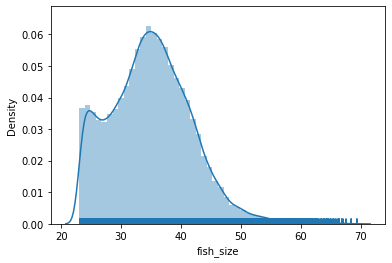

In [9]:
# 분포 확인

import seaborn as sns

x = df_total_우럭['fish_size']
# sns.set(rc = {'figure.figsize':(10,8)})  ==> PPT에 붙일 때 주석 풀어서 진행하기
sns.distplot(x, kde=True, rug=True)
plt.show()

In [10]:
# 상위 %인지 백분위 수 형식으로 표시

df_total_우럭['Percentile Rank'] = df_total_우럭.fish_size.rank(pct = True, method='min').round(2)
df_total_우럭 

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/3682118622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_우럭['Percentile Rank'] = df_total_우럭.fish_size.rank(pct = True, method='min').round(2)


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank
0,./560364_objt_kr_2021-02-05_11-42-12-33_002.JPG,2704,1520,96,"[383, 292, 1012, 398]",1,26.775833,0.13
2,./178923_objt_kr_2020-12-20_13-43-46-66_003.JPG,2704,1520,96,"[262, 743, 1286, 470]",1,34.025416,0.45
7,./605927_objt_kr_2021-02-05_13-11-22-66_003.JPG,2704,1520,96,"[336, 986, 876, 300]",1,23.177500,0.01
9,./438764_objt_kr_2021-01-28_12-06-28-66_003.JPG,2704,1520,96,"[778, 623, 930, 338]",1,24.606250,0.06
18,./164203_objt_kr_2020-12-19_19-01-47-33_002.JPG,2704,1520,96,"[714, 272, 1626, 721]",1,43.021249,0.89
...,...,...,...,...,...,...,...,...
400386,./561396_objt_kr_2021-02-05_14-14-32-33_002.JPG,2704,1520,96,"[1310, 446, 1117, 380]",1,29.553958,0.23
400407,./543141_objt_kr_2021-02-05_09-36-36-33_002.JPG,2704,1520,96,"[1442, 735, 967, 471]",1,25.585208,0.09
400411,./404803_objt_kr_2021-01-25_10-27-36-00_001.JPG,2704,1520,96,"[261, 417, 1500, 576]",1,39.687500,0.77
400414,./419587_objt_kr_2021-01-25_14-26-33-00_001.JPG,2704,1520,96,"[983, 548, 1425, 477]",1,37.703125,0.67


In [11]:
# 상위 %별 점수 부여

def get_score(Percentile_Rank):
    if Percentile_Rank >= 0.99: # 상위 0.1% 이내
        score = 100
    elif 0.90 < Percentile_Rank: # 상위 10% 이내
        score = 90
    elif 0.85 < Percentile_Rank: # 상위 15% 이내
        score = 85
    elif 0.80 <  Percentile_Rank: # 상위 20% 이내
        score = 80
    elif 0.75 < Percentile_Rank: # 상위 25% 이내
        score = 75
    elif 0.70 < Percentile_Rank: # 상위 30% 이내
        score = 70
    elif 0.65 < Percentile_Rank: # 상위 35% 이내
        score = 65
    elif 0.60 < Percentile_Rank: # 상위 40% 이내
        score = 60
    elif 0.55 < Percentile_Rank: # 상위 45% 이내
        score = 55
    elif 0.50 < Percentile_Rank: # 상위 50% 이내
        score = 50
    elif 0.45 < Percentile_Rank: # 상위 55% 이내
        score = 45
    elif 0.40 < Percentile_Rank: # 상위 60% 이내
        score = 40
    elif 0.35 < Percentile_Rank: # 상위 65% 이내
        score = 35
    elif 0.30 < Percentile_Rank: # 상위 70% 이내
        score = 30
    elif 0.25 < Percentile_Rank: # 상위 75% 이내
        score = 25
    elif 0.20 < Percentile_Rank: # 상위 80% 이내
        score = 20
    elif 0.15 < Percentile_Rank: # 상위 85% 이내
        score = 15
    elif 0.10 < Percentile_Rank: # 상위 90% 이내
        score = 10
    elif Percentile_Rank <= 0.10: # 그 이하
        score = 5
    return score

        
df_total_우럭['score'] = df_total_우럭['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))
df_total_우럭

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/1479286519.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_우럭['score'] = df_total_우럭['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank,score
0,./560364_objt_kr_2021-02-05_11-42-12-33_002.JPG,2704,1520,96,"[383, 292, 1012, 398]",1,26.775833,0.13,10
2,./178923_objt_kr_2020-12-20_13-43-46-66_003.JPG,2704,1520,96,"[262, 743, 1286, 470]",1,34.025416,0.45,40
7,./605927_objt_kr_2021-02-05_13-11-22-66_003.JPG,2704,1520,96,"[336, 986, 876, 300]",1,23.177500,0.01,5
9,./438764_objt_kr_2021-01-28_12-06-28-66_003.JPG,2704,1520,96,"[778, 623, 930, 338]",1,24.606250,0.06,5
18,./164203_objt_kr_2020-12-19_19-01-47-33_002.JPG,2704,1520,96,"[714, 272, 1626, 721]",1,43.021249,0.89,85
...,...,...,...,...,...,...,...,...,...
400386,./561396_objt_kr_2021-02-05_14-14-32-33_002.JPG,2704,1520,96,"[1310, 446, 1117, 380]",1,29.553958,0.23,20
400407,./543141_objt_kr_2021-02-05_09-36-36-33_002.JPG,2704,1520,96,"[1442, 735, 967, 471]",1,25.585208,0.09,5
400411,./404803_objt_kr_2021-01-25_10-27-36-00_001.JPG,2704,1520,96,"[261, 417, 1500, 576]",1,39.687500,0.77,75
400414,./419587_objt_kr_2021-01-25_14-26-33-00_001.JPG,2704,1520,96,"[983, 548, 1425, 477]",1,37.703125,0.67,65


---

### <참돔>

In [12]:
# 참돔 : category_id = 2 / 체장금지길이 : 24이하 

df_total_참돔 = df_total[(df_total['category_id']==2)&(df_total['fish_size'] > 24)]
df_total_참돔

,file_name,width,height,dpi,bbox,category_id,fish_size
8,./119799_objt_rs_2020-12-15_13-14-02-33_002.JPG,2704,1520,96,"[511, 423, 1106, 478]",2,29.262916
17,./282150_objt_rs_2021-01-18_09-30-14-33_002.JPG,2704,1520,96,"[496, 718, 1457, 585]",2,38.549791
29,./130071_objt_rs_2020-12-16_14-54-54-33_002.JPG,2704,1520,96,"[388, 1060, 928, 352]",2,24.553333
31,./244244_objt_rs_2021-01-08_17-49-23-33_003.jpg,2704,1520,96,"[1187, 702, 1120, 556]",2,29.633333
47,./585750_objt_rs_2021-01-18_16-43-00-33_005.JPG,2704,1520,96,"[988, 797, 1220, 518]",2,32.279166
...,...,...,...,...,...,...,...
400823,./160565_objt_rs_2020-12-10_13-54-26-00_001.JPG,2704,1520,96,"[111, 482, 1528, 540]",2,40.428333
400829,./170096_objt_rs_2020-12-10_14-24-32-33_002.JPG,2704,1520,96,"[1321, 806, 1164, 448]",2,30.797500
400830,./169339_objt_rs_2020-12-10_14-55-08-00_001.JPG,2704,1520,96,"[201, 63, 1300, 633]",2,34.395833
400834,./90641_objt_rs_2020-12-05_12-59-16-00_001.JPG,2704,1520,96,"[558, 722, 952, 421]",2,25.188333


/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


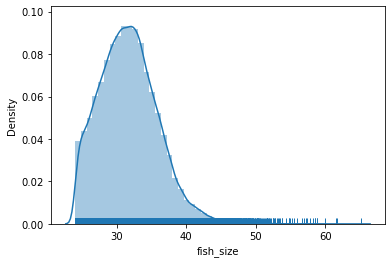

In [13]:
# 분포 확인

import seaborn as sns

x = df_total_참돔['fish_size']
# sns.set(rc = {'figure.figsize':(10,8)})  ==> PPT에 붙일 때 주석 풀어서 진행하기
sns.distplot(x, kde=True, rug=True)
plt.show()

In [14]:
# 상위 %인지 백분위 수 형식으로 표시

df_total_참돔['Percentile Rank'] = df_total_참돔.fish_size.rank(pct = True, method='min').round(2)
df_total_참돔 

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/2364803209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_참돔['Percentile Rank'] = df_total_참돔.fish_size.rank(pct = True, method='min').round(2)


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank
8,./119799_objt_rs_2020-12-15_13-14-02-33_002.JPG,2704,1520,96,"[511, 423, 1106, 478]",2,29.262916,0.30
17,./282150_objt_rs_2021-01-18_09-30-14-33_002.JPG,2704,1520,96,"[496, 718, 1457, 585]",2,38.549791,0.94
29,./130071_objt_rs_2020-12-16_14-54-54-33_002.JPG,2704,1520,96,"[388, 1060, 928, 352]",2,24.553333,0.02
31,./244244_objt_rs_2021-01-08_17-49-23-33_003.jpg,2704,1520,96,"[1187, 702, 1120, 556]",2,29.633333,0.33
47,./585750_objt_rs_2021-01-18_16-43-00-33_005.JPG,2704,1520,96,"[988, 797, 1220, 518]",2,32.279166,0.57
...,...,...,...,...,...,...,...,...
400823,./160565_objt_rs_2020-12-10_13-54-26-00_001.JPG,2704,1520,96,"[111, 482, 1528, 540]",2,40.428333,0.97
400829,./170096_objt_rs_2020-12-10_14-24-32-33_002.JPG,2704,1520,96,"[1321, 806, 1164, 448]",2,30.797500,0.44
400830,./169339_objt_rs_2020-12-10_14-55-08-00_001.JPG,2704,1520,96,"[201, 63, 1300, 633]",2,34.395833,0.75
400834,./90641_objt_rs_2020-12-05_12-59-16-00_001.JPG,2704,1520,96,"[558, 722, 952, 421]",2,25.188333,0.05


In [15]:
# 상위 %별 점수 부여

def get_score(Percentile_Rank):
    if Percentile_Rank >= 0.99: # 상위 0.1% 이내
        score = 100
    elif 0.90 < Percentile_Rank: # 상위 10% 이내
        score = 90
    elif 0.85 < Percentile_Rank: # 상위 15% 이내
        score = 85
    elif 0.80 <  Percentile_Rank: # 상위 20% 이내
        score = 80
    elif 0.75 < Percentile_Rank: # 상위 25% 이내
        score = 75
    elif 0.70 < Percentile_Rank: # 상위 30% 이내
        score = 70
    elif 0.65 < Percentile_Rank: # 상위 35% 이내
        score = 65
    elif 0.60 < Percentile_Rank: # 상위 40% 이내
        score = 60
    elif 0.55 < Percentile_Rank: # 상위 45% 이내
        score = 55
    elif 0.50 < Percentile_Rank: # 상위 50% 이내
        score = 50
    elif 0.45 < Percentile_Rank: # 상위 55% 이내
        score = 45
    elif 0.40 < Percentile_Rank: # 상위 60% 이내
        score = 40
    elif 0.35 < Percentile_Rank: # 상위 65% 이내
        score = 35
    elif 0.30 < Percentile_Rank: # 상위 70% 이내
        score = 30
    elif 0.25 < Percentile_Rank: # 상위 75% 이내
        score = 25
    elif 0.20 < Percentile_Rank: # 상위 80% 이내
        score = 20
    elif 0.15 < Percentile_Rank: # 상위 85% 이내
        score = 15
    elif 0.10 < Percentile_Rank: # 상위 90% 이내
        score = 10
    elif Percentile_Rank <= 0.10: # 그 이하
        score = 5
    return score

        
df_total_참돔['score'] = df_total_참돔['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))
df_total_참돔

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/3772154318.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_참돔['score'] = df_total_참돔['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank,score
8,./119799_objt_rs_2020-12-15_13-14-02-33_002.JPG,2704,1520,96,"[511, 423, 1106, 478]",2,29.262916,0.30,25
17,./282150_objt_rs_2021-01-18_09-30-14-33_002.JPG,2704,1520,96,"[496, 718, 1457, 585]",2,38.549791,0.94,90
29,./130071_objt_rs_2020-12-16_14-54-54-33_002.JPG,2704,1520,96,"[388, 1060, 928, 352]",2,24.553333,0.02,5
31,./244244_objt_rs_2021-01-08_17-49-23-33_003.jpg,2704,1520,96,"[1187, 702, 1120, 556]",2,29.633333,0.33,30
47,./585750_objt_rs_2021-01-18_16-43-00-33_005.JPG,2704,1520,96,"[988, 797, 1220, 518]",2,32.279166,0.57,55
...,...,...,...,...,...,...,...,...,...
400823,./160565_objt_rs_2020-12-10_13-54-26-00_001.JPG,2704,1520,96,"[111, 482, 1528, 540]",2,40.428333,0.97,90
400829,./170096_objt_rs_2020-12-10_14-24-32-33_002.JPG,2704,1520,96,"[1321, 806, 1164, 448]",2,30.797500,0.44,40
400830,./169339_objt_rs_2020-12-10_14-55-08-00_001.JPG,2704,1520,96,"[201, 63, 1300, 633]",2,34.395833,0.75,70
400834,./90641_objt_rs_2020-12-05_12-59-16-00_001.JPG,2704,1520,96,"[558, 722, 952, 421]",2,25.188333,0.05,5


---

### <감성돔>

In [16]:
# 감성돔 : category_id = 3 / 체장금지길이 : 25이하 

df_total_감성돔 = df_total[(df_total['category_id']==3)&(df_total['fish_size'] > 25)]
df_total_감성돔

,file_name,width,height,dpi,bbox,category_id,fish_size
1,./311867_objt_bp_2021-01-19_15-31-35-33_002.JPG,2704,1520,96,"[938, 715, 1217, 552]",3,32.199791
3,./234110_objt_bp_2021-01-12_09-55-50-00_001.JPG,2704,1520,96,"[413, 595, 1353, 673]",3,35.798125
12,./307288_objt_bp_2021-01-19_12-04-30-66_003.JPG,2704,1520,96,"[311, 146, 1328, 631]",3,35.136666
13,./201414_objt_bp_2020-12-21_13-43-25-00_001.JPG,2704,1520,96,"[905, 398, 1100, 478]",3,29.104166
22,./242509_objt_bp_2021-01-12_11-57-44-66_003.JPG,2704,1520,96,"[652, 588, 1324, 582]",3,35.030833
...,...,...,...,...,...,...,...
401196,./634677_objt_bp_2021-02-08_09-11-16-66_003.JPG,2704,1520,96,"[713, 832, 1097, 446]",3,29.024791
401198,./634744_objt_bp_2021-02-08_09-13-00-66_006.JPG,2704,1520,96,"[905, 289, 1044, 379]",3,27.622500
401199,./634921_objt_bp_2021-02-08_09-16-37-33_002.JPG,2704,1520,96,"[43, 625, 1421, 625]",3,37.597291
401201,./634638_objt_bp_2021-02-08_09-12-35-33_002.JPG,2704,1520,96,"[1039, 411, 1183, 448]",3,31.300208


/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


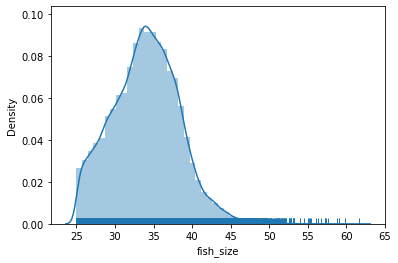

In [17]:
# 분포 확인

import seaborn as sns

x = df_total_감성돔['fish_size']
# sns.set(rc = {'figure.figsize':(10,8)})  ==> PPT에 붙일 때 주석 풀어서 진행하기
sns.distplot(x, kde=True, rug=True)
plt.show()

In [18]:
# 상위 %인지 백분위 수 형식으로 표시

df_total_감성돔['Percentile Rank'] = df_total_감성돔.fish_size.rank(pct = True, method='min').round(2)
df_total_감성돔

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/2929145032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_감성돔['Percentile Rank'] = df_total_감성돔.fish_size.rank(pct = True, method='min').round(2)


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank
1,./311867_objt_bp_2021-01-19_15-31-35-33_002.JPG,2704,1520,96,"[938, 715, 1217, 552]",3,32.199791,0.34
3,./234110_objt_bp_2021-01-12_09-55-50-00_001.JPG,2704,1520,96,"[413, 595, 1353, 673]",3,35.798125,0.66
12,./307288_objt_bp_2021-01-19_12-04-30-66_003.JPG,2704,1520,96,"[311, 146, 1328, 631]",3,35.136666,0.60
13,./201414_objt_bp_2020-12-21_13-43-25-00_001.JPG,2704,1520,96,"[905, 398, 1100, 478]",3,29.104166,0.15
22,./242509_objt_bp_2021-01-12_11-57-44-66_003.JPG,2704,1520,96,"[652, 588, 1324, 582]",3,35.030833,0.59
...,...,...,...,...,...,...,...,...
401196,./634677_objt_bp_2021-02-08_09-11-16-66_003.JPG,2704,1520,96,"[713, 832, 1097, 446]",3,29.024791,0.14
401198,./634744_objt_bp_2021-02-08_09-13-00-66_006.JPG,2704,1520,96,"[905, 289, 1044, 379]",3,27.622500,0.08
401199,./634921_objt_bp_2021-02-08_09-16-37-33_002.JPG,2704,1520,96,"[43, 625, 1421, 625]",3,37.597291,0.80
401201,./634638_objt_bp_2021-02-08_09-12-35-33_002.JPG,2704,1520,96,"[1039, 411, 1183, 448]",3,31.300208,0.27


In [19]:
# 상위 %별 점수 부여

def get_score(Percentile_Rank):
    if Percentile_Rank >= 0.99: # 상위 0.1% 이내
        score = 100
    elif 0.90 < Percentile_Rank: # 상위 10% 이내
        score = 90
    elif 0.85 < Percentile_Rank: # 상위 15% 이내
        score = 85
    elif 0.80 <  Percentile_Rank: # 상위 20% 이내
        score = 80
    elif 0.75 < Percentile_Rank: # 상위 25% 이내
        score = 75
    elif 0.70 < Percentile_Rank: # 상위 30% 이내
        score = 70
    elif 0.65 < Percentile_Rank: # 상위 35% 이내
        score = 65
    elif 0.60 < Percentile_Rank: # 상위 40% 이내
        score = 60
    elif 0.55 < Percentile_Rank: # 상위 45% 이내
        score = 55
    elif 0.50 < Percentile_Rank: # 상위 50% 이내
        score = 50
    elif 0.45 < Percentile_Rank: # 상위 55% 이내
        score = 45
    elif 0.40 < Percentile_Rank: # 상위 60% 이내
        score = 40
    elif 0.35 < Percentile_Rank: # 상위 65% 이내
        score = 35
    elif 0.30 < Percentile_Rank: # 상위 70% 이내
        score = 30
    elif 0.25 < Percentile_Rank: # 상위 75% 이내
        score = 25
    elif 0.20 < Percentile_Rank: # 상위 80% 이내
        score = 20
    elif 0.15 < Percentile_Rank: # 상위 85% 이내
        score = 15
    elif 0.10 < Percentile_Rank: # 상위 90% 이내
        score = 10
    elif Percentile_Rank <= 0.10: # 그 이하
        score = 5
    return score

        
df_total_감성돔['score'] = df_total_감성돔['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))
df_total_감성돔

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/562719308.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_감성돔['score'] = df_total_감성돔['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank,score
1,./311867_objt_bp_2021-01-19_15-31-35-33_002.JPG,2704,1520,96,"[938, 715, 1217, 552]",3,32.199791,0.34,30
3,./234110_objt_bp_2021-01-12_09-55-50-00_001.JPG,2704,1520,96,"[413, 595, 1353, 673]",3,35.798125,0.66,65
12,./307288_objt_bp_2021-01-19_12-04-30-66_003.JPG,2704,1520,96,"[311, 146, 1328, 631]",3,35.136666,0.60,55
13,./201414_objt_bp_2020-12-21_13-43-25-00_001.JPG,2704,1520,96,"[905, 398, 1100, 478]",3,29.104166,0.15,10
22,./242509_objt_bp_2021-01-12_11-57-44-66_003.JPG,2704,1520,96,"[652, 588, 1324, 582]",3,35.030833,0.59,55
...,...,...,...,...,...,...,...,...,...
401196,./634677_objt_bp_2021-02-08_09-11-16-66_003.JPG,2704,1520,96,"[713, 832, 1097, 446]",3,29.024791,0.14,10
401198,./634744_objt_bp_2021-02-08_09-13-00-66_006.JPG,2704,1520,96,"[905, 289, 1044, 379]",3,27.622500,0.08,5
401199,./634921_objt_bp_2021-02-08_09-16-37-33_002.JPG,2704,1520,96,"[43, 625, 1421, 625]",3,37.597291,0.80,75
401201,./634638_objt_bp_2021-02-08_09-12-35-33_002.JPG,2704,1520,96,"[1039, 411, 1183, 448]",3,31.300208,0.27,25


---

### <돌돔>

In [20]:
# 돌돔 : category_id = 4 / 체장금지길이 : 24이하 

df_total_돌돔 = df_total[(df_total['category_id']==4)&(df_total['fish_size'] > 24)]
df_total_돌돔

,file_name,width,height,dpi,bbox,category_id,fish_size
4,./392885_objt_rb_2021-01-22_10-26-05-33_002.JPG,2704,1520,96,"[731, 39, 1113, 771]",4,29.448125
10,./362955_objt_rb_2021-01-23_09-05-17-66_004.JPG,2704,1520,96,"[657, 759, 1042, 564]",4,27.569583
11,./526536_objt_rb_2021-02-01_11-11-58-33_002.JPG,2704,1520,96,"[274, 659, 1154, 632]",4,30.532916
16,./398668_objt_rb_2021-01-21_22-04-25-33_002.JPG,2704,1520,96,"[1159, 632, 1488, 615]",4,39.370000
19,./526584_objt_rb_2021-02-01_11-12-46-00_001.JPG,2704,1520,96,"[1355, 21, 1069, 557]",4,28.283958
...,...,...,...,...,...,...,...
401188,./216146_objt_rb_2021-01-05_11-23-57-66_003.jpg,2704,1520,96,"[594, 271, 1404, 766]",4,37.147500
401189,./280577_objt_rb_2021-01-15_10-11-19-00_001.JPG,2704,1520,96,"[217, 79, 1482, 774]",4,39.211250
401190,./228334_objt_rb_2020-12-29_16-58-03-00_001.jpg,2704,1520,96,"[330, 500, 1355, 687]",4,35.851041
401191,./372716_objt_rb_2021-01-23_15-09-43-00_001.JPG,2704,1520,96,"[819, 739, 1179, 647]",4,31.194375


/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kyeongmialicekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


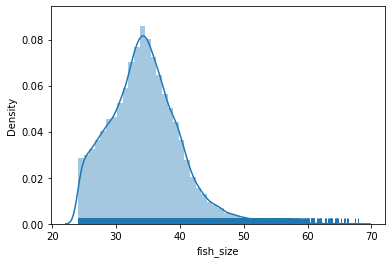

In [21]:
# 분포 확인

import seaborn as sns

x = df_total_돌돔['fish_size']
# sns.set(rc = {'figure.figsize':(10,8)})  ==> PPT에 붙일 때 주석 풀어서 진행하기
sns.distplot(x, kde=True, rug=True)
plt.show()

In [22]:
# 상위 %인지 백분위 수 형식으로 표시

df_total_돌돔['Percentile Rank'] = df_total_돌돔.fish_size.rank(pct = True, method='min').round(2)
df_total_돌돔

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/214918120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_돌돔['Percentile Rank'] = df_total_돌돔.fish_size.rank(pct = True, method='min').round(2)


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank
4,./392885_objt_rb_2021-01-22_10-26-05-33_002.JPG,2704,1520,96,"[731, 39, 1113, 771]",4,29.448125,0.19
10,./362955_objt_rb_2021-01-23_09-05-17-66_004.JPG,2704,1520,96,"[657, 759, 1042, 564]",4,27.569583,0.11
11,./526536_objt_rb_2021-02-01_11-11-58-33_002.JPG,2704,1520,96,"[274, 659, 1154, 632]",4,30.532916,0.25
16,./398668_objt_rb_2021-01-21_22-04-25-33_002.JPG,2704,1520,96,"[1159, 632, 1488, 615]",4,39.370000,0.83
19,./526584_objt_rb_2021-02-01_11-12-46-00_001.JPG,2704,1520,96,"[1355, 21, 1069, 557]",4,28.283958,0.14
...,...,...,...,...,...,...,...,...
401188,./216146_objt_rb_2021-01-05_11-23-57-66_003.jpg,2704,1520,96,"[594, 271, 1404, 766]",4,37.147500,0.72
401189,./280577_objt_rb_2021-01-15_10-11-19-00_001.JPG,2704,1520,96,"[217, 79, 1482, 774]",4,39.211250,0.83
401190,./228334_objt_rb_2020-12-29_16-58-03-00_001.jpg,2704,1520,96,"[330, 500, 1355, 687]",4,35.851041,0.63
401191,./372716_objt_rb_2021-01-23_15-09-43-00_001.JPG,2704,1520,96,"[819, 739, 1179, 647]",4,31.194375,0.28


In [23]:
# 상위 %별 점수 부여

def get_score(Percentile_Rank):
    if Percentile_Rank >= 0.99: # 상위 0.1% 이내
        score = 100
    elif 0.90 < Percentile_Rank: # 상위 10% 이내
        score = 90
    elif 0.85 < Percentile_Rank: # 상위 15% 이내
        score = 85
    elif 0.80 <  Percentile_Rank: # 상위 20% 이내
        score = 80
    elif 0.75 < Percentile_Rank: # 상위 25% 이내
        score = 75
    elif 0.70 < Percentile_Rank: # 상위 30% 이내
        score = 70
    elif 0.65 < Percentile_Rank: # 상위 35% 이내
        score = 65
    elif 0.60 < Percentile_Rank: # 상위 40% 이내
        score = 60
    elif 0.55 < Percentile_Rank: # 상위 45% 이내
        score = 55
    elif 0.50 < Percentile_Rank: # 상위 50% 이내
        score = 50
    elif 0.45 < Percentile_Rank: # 상위 55% 이내
        score = 45
    elif 0.40 < Percentile_Rank: # 상위 60% 이내
        score = 40
    elif 0.35 < Percentile_Rank: # 상위 65% 이내
        score = 35
    elif 0.30 < Percentile_Rank: # 상위 70% 이내
        score = 30
    elif 0.25 < Percentile_Rank: # 상위 75% 이내
        score = 25
    elif 0.20 < Percentile_Rank: # 상위 80% 이내
        score = 20
    elif 0.15 < Percentile_Rank: # 상위 85% 이내
        score = 15
    elif 0.10 < Percentile_Rank: # 상위 90% 이내
        score = 10
    elif Percentile_Rank <= 0.10: # 그 이하
        score = 5
    return score

        
df_total_돌돔['score'] = df_total_돌돔['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))
df_total_돌돔

/var/folders/tn/bfvnwzjj4xn3d7bqc2nx96nr0000gn/T/ipykernel_24561/591657249.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_돌돔['score'] = df_total_돌돔['Percentile Rank'].apply(lambda Percentile_Rank: get_score(Percentile_Rank))


,file_name,width,height,dpi,bbox,category_id,fish_size,Percentile Rank,score
4,./392885_objt_rb_2021-01-22_10-26-05-33_002.JPG,2704,1520,96,"[731, 39, 1113, 771]",4,29.448125,0.19,15
10,./362955_objt_rb_2021-01-23_09-05-17-66_004.JPG,2704,1520,96,"[657, 759, 1042, 564]",4,27.569583,0.11,10
11,./526536_objt_rb_2021-02-01_11-11-58-33_002.JPG,2704,1520,96,"[274, 659, 1154, 632]",4,30.532916,0.25,20
16,./398668_objt_rb_2021-01-21_22-04-25-33_002.JPG,2704,1520,96,"[1159, 632, 1488, 615]",4,39.370000,0.83,80
19,./526584_objt_rb_2021-02-01_11-12-46-00_001.JPG,2704,1520,96,"[1355, 21, 1069, 557]",4,28.283958,0.14,10
...,...,...,...,...,...,...,...,...,...
401188,./216146_objt_rb_2021-01-05_11-23-57-66_003.jpg,2704,1520,96,"[594, 271, 1404, 766]",4,37.147500,0.72,70
401189,./280577_objt_rb_2021-01-15_10-11-19-00_001.JPG,2704,1520,96,"[217, 79, 1482, 774]",4,39.211250,0.83,80
401190,./228334_objt_rb_2020-12-29_16-58-03-00_001.jpg,2704,1520,96,"[330, 500, 1355, 687]",4,35.851041,0.63,60
401191,./372716_objt_rb_2021-01-23_15-09-43-00_001.JPG,2704,1520,96,"[819, 739, 1179, 647]",4,31.194375,0.28,25
